In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/graduate-admissions/Admission_Predict.csv
/kaggle/input/graduate-admissions/Admission_Predict_Ver1.1.csv


In [4]:
df = pd.read_csv('/kaggle/input/graduate-admissions/Admission_Predict_Ver1.1.csv')

In [5]:
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          500 non-null    int64  
 2   TOEFL Score        500 non-null    int64  
 3   University Rating  500 non-null    int64  
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 35.3 KB


In [7]:
df.duplicated().sum()

0

In [8]:
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [11]:
df = df.iloc[:,1:]

In [12]:
df.shape


(500, 8)

In [16]:
X=df.iloc[:,1:-1]
y=df.iloc[:,-1]

In [18]:
from sklearn.model_selection  import train_test_split

In [19]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [21]:
print(X_train.shape,X_test.shape)

(400, 6) (100, 6)


In [22]:
from sklearn.preprocessing import MinMaxScaler

In [23]:
scalar = MinMaxScaler()

In [24]:
X_train_transform = scalar.fit_transform(X_train)
X_test_transform = scalar.transform(X_test)

In [35]:
X_train_transform.shape

(400, 6)

In [25]:
X_test_transform

array([[ 0.92592593,  1.        ,  1.        ,  1.        ,  0.81730769,
         1.        ],
       [ 0.33333333,  0.5       ,  0.875     ,  0.75      ,  0.58974359,
         1.        ],
       [ 0.40740741,  0.25      ,  0.375     ,  0.125     ,  0.31730769,
         0.        ],
       [ 0.74074074,  0.75      ,  1.        ,  1.        ,  0.94230769,
         1.        ],
       [ 0.22222222,  0.25      ,  0.375     ,  0.375     ,  0.39423077,
         0.        ],
       [ 0.40740741,  0.5       ,  0.75      ,  0.375     ,  0.41666667,
         0.        ],
       [ 0.51851852,  0.75      ,  0.75      ,  0.875     ,  0.66346154,
         1.        ],
       [ 0.44444444,  0.25      ,  0.375     ,  0.75      ,  0.28205128,
         0.        ],
       [ 0.14814815,  0.25      ,  0.125     ,  0.25      ,  0.26923077,
         0.        ],
       [ 0.44444444,  0.25      ,  0.5       ,  0.75      ,  0.42628205,
         0.        ],
       [ 0.44444444,  0.75      ,  0.5       ,  0.

In [28]:
import tensorflow
from tensorflow import keras
from tensorflow.keras.layers import Dense,Flatten
from keras import Sequential

In [71]:
model = Sequential()
model.add(Dense(32,activation='relu',input_dim=6))
model.add(Dense(1,activation='linear'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [72]:
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_8 (Dense)                      │ (None, 32)                  │             224 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 257 (1.00 KB)

 Trainable params: 257 (1.00 KB)

 Non-trainable params: 0 (0.00 B)

In [73]:
model.compile(optimizer='adam',loss='mean_squared_error',metrics=['r2_score'])

In [74]:
history = model.fit(X_train_transform,y_train,epochs=50,validation_split=0.2)

Epoch 1/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0449 - r2_score: -1.6502 - val_loss: 0.0124 - val_r2_score: 0.2137
Epoch 2/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0173 - r2_score: 0.1301 - val_loss: 0.0138 - val_r2_score: 0.1272
Epoch 3/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0162 - r2_score: 0.2695 - val_loss: 0.0101 - val_r2_score: 0.3608
Epoch 4/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0136 - r2_score: 0.3265 - val_loss: 0.0090 - val_r2_score: 0.4262
Epoch 5/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0096 - r2_score: 0.5343 - val_loss: 0.0080 - val_r2_score: 0.4918
Epoch 6/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0104 - r2_score: 0.5464 - val_loss: 0.0074 - val_r2_score: 0.5287
Epoch 7/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0085 - r2_score: 0.5788 - val_loss: 0.0070 - val_r2_score: 0.5561
Epoch 8/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0077 - r2_score: 0.6164 - val_loss: 0.0065 - val_r2_scor

In [75]:
y_pred = model.predict(X_test_transform)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


In [76]:
from sklearn.metrics import r2_score

In [77]:
r2_score(y_test,y_pred)

0.7748897547997348

In [78]:
import matplotlib.pyplot as plt

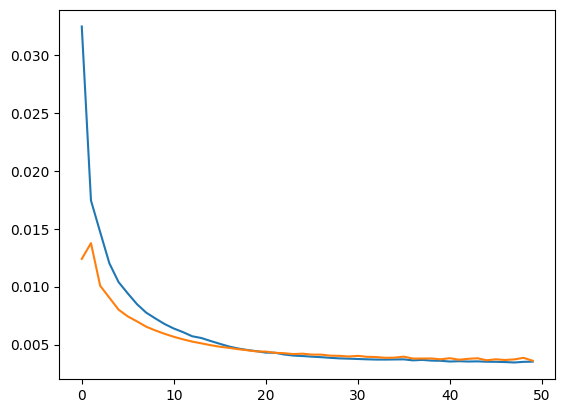

In [79]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

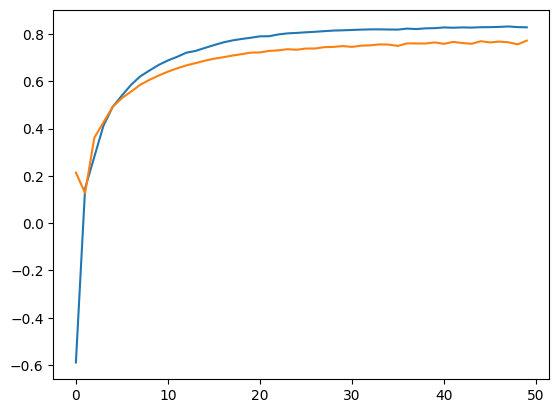

In [80]:
plt.plot(history.history['r2_score'])
plt.plot(history.history['val_r2_score'])